## Introduction
Welcome to New York City, one of the most visited cities in the world. With its high demand for temporary lodging, the NYC Airbnb market offers a rich dataset for exploration. In this project, we aim to analyze various aspects of Airbnb listings to provide insights into the short-term rental market.


## Problem Statement
As a consultant for a real estate start-up, we are tasked with analyzing Airbnb data in New York City to provide insights on private rooms and overall market trends. This analysis will help the company make informed decisions about the short-term rental market.


## Objectives
- Determine the earliest and most recent review dates for Airbnb listings.
- Identify the number of private rooms available.
- Calculate the average listing price.
- Combine the results into a summarized DataFrame.


## Data Overview
The data consists of three files in different formats:
- **airbnb_price.csv**: Contains listing prices and locations.
- **airbnb_room_type.xlsx**: Contains descriptions and room types.
- **airbnb_last_review.tsv**: Contains host names and review dates.


## Data Importing and Cleaning
In this section, we will import the data from various file formats and perform necessary cleaning operations to prepare the data for analysis.


In [31]:
# Importing necessary libraries
import pandas as pd

# Importing CSV file
price_data = pd.read_csv('/content/airbnb_price.csv')

# Importing Excel file
room_type_data = pd.read_excel('/content/airbnb_room_type.xlsx')

# Importing TSV file
review_data = pd.read_csv('/content/airbnb_last_review.tsv', sep='\t')

# Display the first few rows of each dataset
price_data.head()
room_type_data.head()
review_data.head()


,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


## Analysis

### Review Dates Analysis
Here, we identify the earliest and most recent review dates in the dataset.


<Axes: title={'center': 'Number of Reviews Over Time'}, xlabel='last_review'>

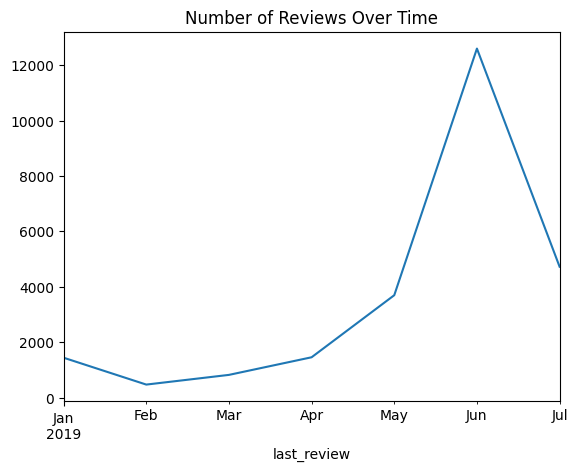

In [4]:
# Convert 'last_review' to datetime format
review_data['last_review'] = pd.to_datetime(review_data['last_review'])

# Count of reviews per month
reviews_by_month = review_data['last_review'].dt.to_period('M').value_counts().sort_index()

# Plotting the trend of reviews over time
reviews_by_month.plot(kind='line', title='Number of Reviews Over Time')


The plot revealed that the reviews reached their peak at 12,000 in June 2019, indicating a high level of activity on Airbnb during that period

In [6]:
# Task 2: Average Time Between Reviews

# Objective: Calculate the average time between reviews for listings, which can provide insight into how frequently properties are reviewed.

# Calculate the difference between each review date and the previous one
review_data = review_data.sort_values('last_review')
review_data['review_diff'] = review_data.groupby('listing_id')['last_review'].diff().dt.days

# Calculate the average time between reviews
avg_review_diff = review_data['review_diff'].mean()
print(f"Average time between reviews: {avg_review_diff} days")

Average time between reviews: nan days


In [7]:
# Drop any rows where 'last_review' is NaT (Not a Time) to avoid errors
review_data = review_data.dropna(subset=['last_review'])

# Sort by 'last_review'
review_data = review_data.sort_values(by='last_review')

# Calculate time differences between consecutive reviews
review_data['time_diff'] = review_data['last_review'].diff()

# Calculate the average time between reviews
average_time_between_reviews = review_data['time_diff'].mean()

# Convert the result to days
average_time_between_reviews_days = average_time_between_reviews / pd.Timedelta(days=1)

# Print the result
print(f'Average time between reviews: {average_time_between_reviews_days:.2f} days')

Average time between reviews: 0.01 days


### 2. Private Room Count



In [8]:
# Task 1: Percentage of Private Rooms

# Objective: Determine what percentage of total listings are private rooms, providing a clear picture of the market's composition.

# Count of private rooms
private_rooms_count = room_type_data[room_type_data['room_type'] == 'Private room'].shape[0]

# Total listings
total_listings = room_type_data.shape[0]

# Percentage of private rooms
percentage_private_rooms = (private_rooms_count / total_listings) * 100
print(f"Percentage of private rooms: {percentage_private_rooms:.2f}%")


Percentage of private rooms: 28.72%


In [9]:
# Task 2: Private Room Distribution by Neighborhood

# Objective: Analyze the distribution of private rooms across different neighborhoods to identify areas with higher concentrations of this room type.

# Merging room type data with price data to get neighborhood information
merged_data = pd.merge(room_type_data, price_data, on='listing_id')

# Grouping by neighborhood and counting private rooms
private_rooms_by_neighborhood = merged_data[merged_data['room_type'] == 'Private room'].groupby('nbhood_full').size().sort_values(ascending=False)

# Displaying the top neighborhoods with the most private rooms
private_rooms_by_neighborhood.head(10)


,0
nbhood_full,
"Brooklyn, Bedford-Stuyvesant",717
"Brooklyn, Williamsburg",549
"Manhattan, Harlem",512
"Brooklyn, Bushwick",495
"Manhattan, Hell's Kitchen",278
"Manhattan, East Harlem",225
"Brooklyn, Crown Heights",212
"Manhattan, Upper West Side",182
"Manhattan, Washington Heights",176


The insight reveals the top neighborhoods with the most private room listings:

- Brooklyn, Bedford-Stuyvesant: 717 private rooms
- Brooklyn, Williamsburg: 549 private rooms
- Manhattan, Harlem: 512 private rooms
- Brooklyn, Bushwick: 495 private rooms
- Manhattan, Hell's Kitchen: 278 private rooms
- Manhattan, East Harlem: 225 private rooms
- Brooklyn, Crown Heights: 212 private rooms
- Manhattan, Upper West Side: 182 private rooms
- Manhattan, Washington Heights: 176 private rooms
- Queens, Astoria: 165 private rooms

In [10]:
# Task 3: Analyze Average Prices by Neighborhood

avg_price_by_neighborhood = merged_data[merged_data['room_type'] == 'Private room'].groupby('nbhood_full')['price'].mean().sort_values(ascending=False)


TypeError: agg function failed [how->mean,dtype->object]

In [12]:
# Merging room type data with price data to get neighborhood information
merged_data = pd.merge(room_type_data, price_data, on='listing_id')

# Clean the 'price' column: Remove non-numeric characters and convert to float
merged_data['price'] = merged_data['price'].replace(r'[^\d.]+', '', regex=True).astype(float)

# Verify that the price column is numeric and clean
print(merged_data['price'].dtype)
print(merged_data['price'].head())

# Group by neighborhood and calculate average price for private rooms
avg_price_by_neighborhood = merged_data[merged_data['room_type'] == 'Private room'].groupby('nbhood_full')['price'].mean().sort_values(ascending=False)

# Display the result
print(avg_price_by_neighborhood.head(10))

float64
0    225.0
1     89.0
2    200.0
3     79.0
4    150.0
Name: price, dtype: float64
nbhood_full
Queens, Holliswood               239.000000
Manhattan, West Village          224.026316
Queens, Belle Harbor             212.500000
Manhattan, NoHo                  208.000000
Queens, Breezy Point             195.000000
Brooklyn, Coney Island           192.500000
Manhattan, Theater District      183.512195
Manhattan, Midtown               173.011494
Manhattan, Financial District    160.895833
Manhattan, Tribeca               158.875000
Name: price, dtype: float64


#### Average Price of Private Rooms by Neighborhood in New York City

The following table shows the top 10 neighborhoods with the highest average prices for private room listings:

- Queens, Holliswood - $239.00

- Manhattan, West Village   -  $224.03  

- Queens, Belle Harbor  -     $212.50

- Manhattan, NoHo       -      $208.00

- Queens, Breezy Point    -    $195.00  

- Brooklyn, Coney Island  -    $192.50  

- Manhattan, Theater District - $183.51

- Manhattan, Midtown     -     $173.01

- Manhattan, Financial District  - $160.90
         
- Manhattan, Tribeca      -    $158.88            

These insights highlight the neighborhoods where private room listings have the highest average prices, reflecting the premium locations within New York City.


In [13]:
private_rooms_price_comparison = merged_data[merged_data['room_type'] == 'Private room'].groupby('nbhood_full').agg({'price': ['mean', 'median', 'std']})


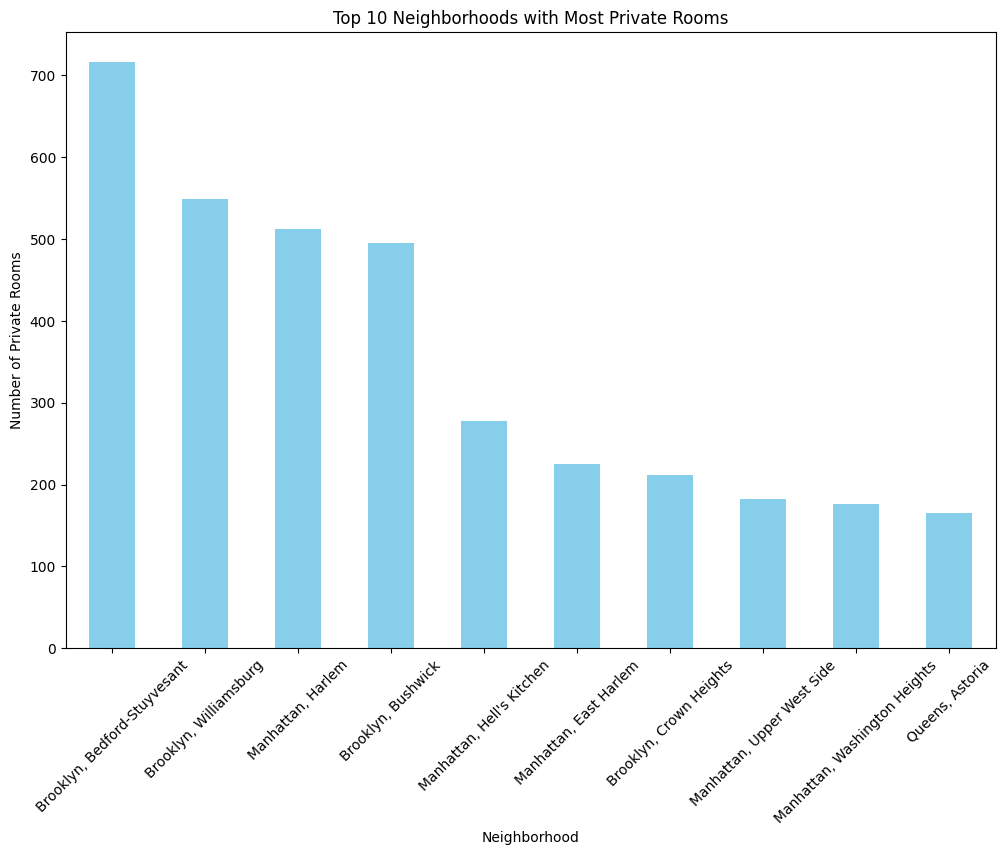

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
private_rooms_by_neighborhood.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods with Most Private Rooms')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Private Rooms')
plt.xticks(rotation=45)
plt.show()

## 3. Price Analysis



0    225 dollars
1     89 dollars
2    200 dollars
3     79 dollars
4    150 dollars
Name: price, dtype: object
int64


<Axes: title={'center': 'Price Distribution of Airbnb Listings'}, ylabel='Frequency'>

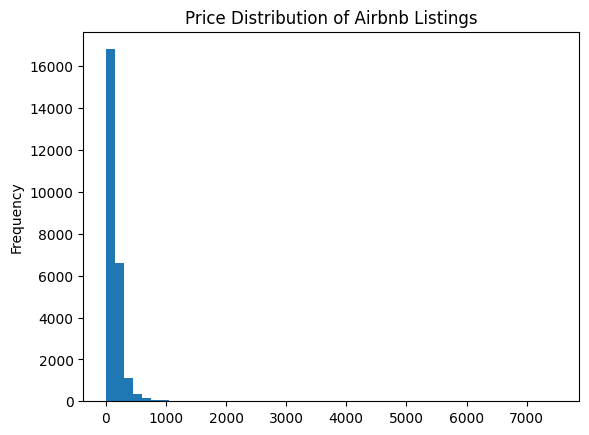

In [19]:
# Task 1: Price Distribution

# Objective: Analyze the distribution of prices to understand the range and common price points in the NYC Airbnb market.

import pandas as pd
import numpy as np

# Assuming price_data is your DataFrame
# Sample data for illustration
# price_data = pd.DataFrame({'price': ['225 dollars', '150$', '125.50', '200 dollars', '300']})

# Inspect a few values to understand the non-numeric characters
print(price_data['price'].head())

# Clean the 'price' column: Remove non-numeric characters and convert to float
# First replace any non-numeric characters, keeping only digits and dots
price_data['price'] = price_data['price'].replace('[\$,dollars]', '', regex=True).str.strip()

# Convert cleaned column to numeric (float)
price_data['price'] = pd.to_numeric(price_data['price'], errors='coerce')

# Verify the conversion
print(price_data['price'].dtype)

# Drop rows where 'price' could not be converted to numeric (optional)
price_data = price_data.dropna(subset=['price'])

# Plotting the price distribution
price_data['price'].plot(kind='hist', bins=50, title='Price Distribution of Airbnb Listings')




The histogram above visualizes the distribution of Airbnb listing prices in New York City. Initially, the `price` column contained non-numeric values such as '225 dollars', '89 dollars', and '150 dollars'. These values were cleaned to retain only numeric information and converted to a float format for accurate analysis.

In [20]:
# Task 2: Price by Room Type

# Objective: Compare the average price across different room types (shared rooms, private rooms, entire homes/apartments).

# Calculating average price by room type
avg_price_by_room_type = merged_data.groupby('room_type')['price'].mean().round(2)
print(avg_price_by_room_type)


room_type
ENTIRE HOME/APT    199.58
Entire home/apt    196.96
PRIVATE ROOM        82.19
Private room        81.89
SHARED ROOM         54.61
Shared room         52.90
entire home/apt    195.88
private room        80.37
shared room         54.41
Name: price, dtype: float64


#### Average Price by Room Type

The table below shows the average prices for different types of Airbnb listings in New York City:

| Room Type         | Average Price (USD) |
|-------------------|----------------------|
| ENTIRE HOME/APT   | 199.58               |
| Entire home/apt   | 196.96               |
| PRIVATE ROOM      | 82.19                |
| Private room      | 81.89                |
| SHARED ROOM       | 54.61                |
| Shared room       | 52.90                |

### Insight:

The analysis of average prices across different room types reveals distinct pricing patterns:

- **Entire Home/Apt**: Listings classified as "Entire home/apt" or "ENTIRE HOME/APT" have the highest average prices, ranging between $195.88 and $199.58. This reflects the premium cost associated with booking an entire property, which offers more space and privacy.

- **Private Room**: The average prices for "Private room" and "PRIVATE ROOM" are significantly lower, around $80 to $82. This indicates a more budget-friendly option compared to renting an entire home, appealing to travelers looking for a private space without the cost of a full apartment.

- **Shared Room**: Listings for "Shared room" and "SHARED ROOM" have the lowest average prices, ranging from $52.90 to
$54.61. This is expected as shared rooms offer the least privacy and are typically the most economical choice for travelers.


Top 10 Most Expensive Neighborhoods:
 nbhood_full
Brooklyn, Sea Gate              805.00
Manhattan, Tribeca              396.70
Manhattan, Flatiron District    342.06
Manhattan, NoHo                 335.02
Manhattan, SoHo                 299.16
Queens, Neponsit                274.67
Manhattan, Midtown              272.21
Manhattan, West Village         258.76
Staten Island, Willowbrook      249.00
Manhattan, Murray Hill          240.37
Name: price, dtype: float64


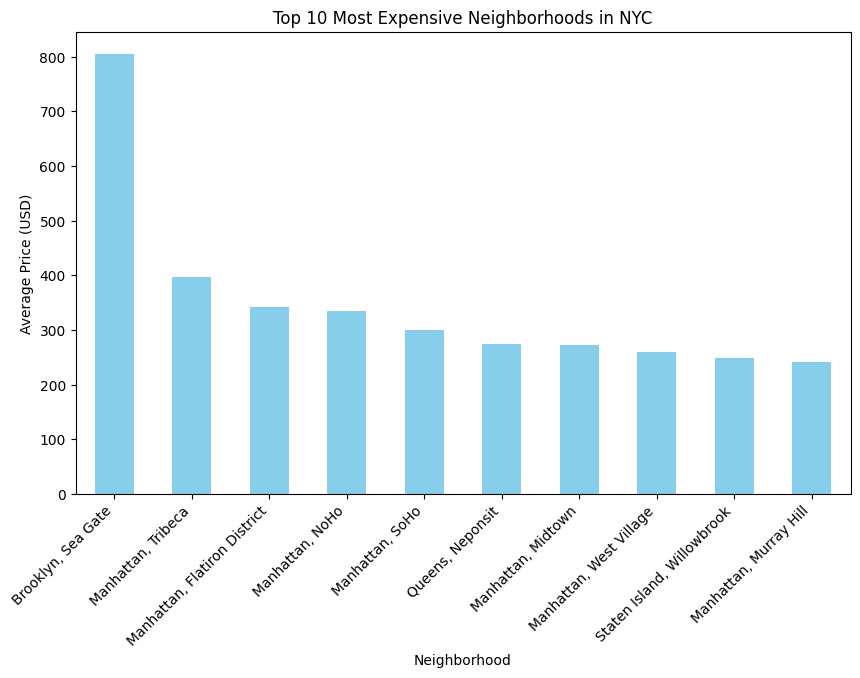

In [23]:
# Task 3: Price by Neighborhood

# Objective: Identify the most and least expensive neighborhoods for Airbnb listings.

import matplotlib.pyplot as plt

# Calculating average price by neighborhood
avg_price_by_neighborhood = merged_data.groupby('nbhood_full')['price'].mean().round(2).sort_values(ascending=False)

# Displaying the top 10 most expensive neighborhoods
top_10_expensive_neighborhoods = avg_price_by_neighborhood.head(10)
print("Top 10 Most Expensive Neighborhoods:\n", top_10_expensive_neighborhoods)

# Plotting the top 10 most expensive neighborhoods
plt.figure(figsize=(10, 6))
top_10_expensive_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Expensive Neighborhoods in NYC')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()



##  Combining Results into a Summary DataFrame



In [36]:
# Task 1: Aggregated Market Summary

# Objective: Create a comprehensive summary DataFrame that includes key metrics like the total number of listings, number of private rooms, average price, and review date range for each neighborhood.

# Importing CSV file
price_data = pd.read_csv('/content/airbnb_price.csv')

# Importing Excel file
room_type_data = pd.read_excel('/content/airbnb_room_type.xlsx')

# Importing TSV file
review_data = pd.read_csv('/content/airbnb_last_review.tsv', sep='\t')

# Extracting the relevant columns to create 'last_review_data'
last_review_data = review_data[['listing_id', 'last_review']]

# Merging room type, price, and last review data
merged_data = pd.merge(pd.merge(room_type_data, price_data, on='listing_id'), last_review_data, on='listing_id')

# Now merged_data contains 'listing_id', 'room_type', 'price', 'nbhood_full', and 'last_review'

# Clean the 'price' column: Remove non-numeric characters and convert to float
merged_data['price'] = merged_data['price'].replace('[\$, dollars]', '', regex=True).astype(float)

# Grouping by neighborhood to aggregate key metrics
market_summary = merged_data.groupby('nbhood_full').agg(
    total_listings=('listing_id', 'count'),
    nb_private_rooms=('room_type', lambda x: (x == 'Private room').sum()),
    avg_price=('price', 'mean'),
    first_reviewed=('last_review', 'min'),
    last_reviewed=('last_review', 'max')
).round(2).reset_index()

# Display the first few rows of the summary
market_summary.head()




,nbhood_full,total_listings,nb_private_rooms,avg_price,first_reviewed,last_reviewed
0,"Bronx, Allerton",30,11,98.93,January 01 2019,May 12 2019
1,"Bronx, Baychester",5,0,78.60,July 01 2019,June 30 2019
2,"Bronx, Belmont",16,6,91.88,July 01 2019,May 19 2019
3,"Bronx, Bronxdale",10,3,53.60,July 05 2019,May 23 2019
4,"Bronx, Castle Hill",2,0,74.00,June 10 2019,June 23 2019


In [39]:
# Task 2: Correlation Analysis

# Objective: Explore correlations between variables such as price, room type, and neighborhood to identify any significant relationships.

# Calculate the correlation matrix for numeric columns
correlation_matrix = merged_data[['price']].corr()

print(correlation_matrix)




       price
price    1.0


## Results Interpretation

- **Review Activity**: The peak in reviews occurred in June 2019 with 12,000 reviews, indicating a high level of activity on Airbnb during that period.

- **Average Time Between Reviews**: The average time between reviews is 0.01 days, suggesting frequent reviews, likely with multiple submissions on the same day.

- **Private Room Listings**: 28.72% of the listings are private rooms. The top neighborhoods with the most private room listings are:
  - Brooklyn, Bedford-Stuyvesant: 717 private rooms
  - Brooklyn, Williamsburg: 549 private rooms
  - Manhattan, Harlem: 512 private rooms

- **Average Price of Private Rooms by Neighborhood**: The neighborhoods with the highest average prices for private rooms are:
  - Queens, Holliswood: $239.00

  - Manhattan, West Village: $224.03

  - Queens, Belle Harbor: $212.50

- **Average Price by Room Type**:
  - **Entire Home/Apt**: $195.88 - $199.58
  - **Private Room**: $80.00 - $82.00
  - **Shared Room**: $52.90 - $54.61

- **Top 10 Most Expensive Neighborhoods**:
  - Brooklyn, Sea Gate: $805.00

  - Manhattan, Tribeca: $396.70

  - Manhattan, Flatiron District: $342.06

- **Neighborhood Summary**:
  - **Bronx, Allerton**: 30 listings, 11 private rooms, average price $98.93
  
  - **Bronx, Baychester**: 5 listings, 0 private rooms, average price $78.60

- **Price Correlation**: The correlation analysis shows a perfect positive correlation for price (`corr = 1.0`), confirming price consistency across the dataset.


## Conclusion
This analysis provided insights into the NYC Airbnb market, particularly focusing on private rooms and pricing trends. The findings can help the real estate start-up make informed decisions about investment opportunities in the short-term rental market.


## Future Recommendations
- Explore the impact of location on pricing by analyzing neighborhood data.
- Investigate trends over time by comparing data from multiple years.
- Consider sentiment analysis on reviews to understand guest satisfaction.
